In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance)
import numpy as np


def my_pca(data_matrix,no_of_components,yes_no):
   
    data_size = len(data_matrix[1])
    
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(len(data_matrix),data_size)
    x_hat = data_matrix - mean_2
    

    cov_matrix = np.cov(x_hat)



    eigen_vals,eigen_vecs = np.linalg.eig(cov_matrix)
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]



    sorted_eigenvectors = eigen_vecs[:,sorted_eigen_indexes]

   

    sum_eigen_vals = sum(eigen_vals)
    #yes_no variable is used here to make it possible for user to specify whether they want to give no. of components or let the algorithm decide it as per the POV
    #no. of components is the variable which lets user select the no. of principal components they want. I did this to accompish question3 of the assignment
    if yes_no !='yes':
        for i in range(1,data_size):
             num_pca = i
             eigen_value_trial=sorted_eigen_values[0:i]
         
             sum_eigen_selected_values= sum(eigen_value_trial)
             pov = (sum_eigen_selected_values/sum_eigen_vals)*100
             #when the POV reaches 90, the eigenvectors selection must be stopped
             if(pov>=90):
                 break
        num_pca = i
    else:
       num_pca= no_of_components
    
    #choosing the calculated number of eigenvectors from the whole set
    eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
    
    #the my_pca function is designed to returned the p, which is then transposed later on and used to calculated the new dimensions to encode and further decode train/test data
    return eigenvector_subset

#here I have just made a random data matrix to test my function
data_matrix=np.random.rand(8,12)
print("original test data matrix=",data_matrix)
eigenvector_subset = my_pca(data_matrix,0,'no')

mean = np.mean(data_matrix,axis=1)
mean_1=np.repeat(mean,len(data_matrix[1]))
mean_2 = mean_1.reshape(len(data_matrix),len(data_matrix[1]))

centralised_data = data_matrix - mean_2
P_transpose = eigenvector_subset.transpose()
print(centralised_data.shape)
print(P_transpose.shape)
z = np.matmul(P_transpose,centralised_data)
print("result of dimensionality reduction using PCA=",z)
print("size of original matrix=",data_matrix.shape)
print("size of reduced matrix=",z.shape)

original test data matrix= [[2.52123410e-01 7.92534149e-01 5.90224767e-01 1.15503097e-01
  5.93941731e-01 1.33407935e-01 8.74108382e-01 5.85189438e-01
  6.34959510e-02 1.32009452e-01 3.94887310e-01 4.83148139e-01]
 [2.34319345e-01 2.44420522e-01 4.87402727e-01 5.95525756e-02
  6.88450823e-01 1.11930136e-01 3.43845392e-02 3.07149383e-01
  4.84259981e-01 1.82113813e-01 5.52844157e-01 8.36223505e-01]
 [9.67938342e-01 4.93105931e-01 8.48063188e-02 6.48248763e-01
  4.57752801e-01 4.69675891e-01 7.06019047e-02 1.50922252e-01
  3.24932291e-01 5.10422490e-01 3.60409057e-01 6.41181730e-01]
 [9.84308420e-01 8.46459883e-01 9.22706965e-01 3.00363633e-01
  3.16005116e-01 8.78369168e-02 4.61434048e-01 9.02586082e-01
  9.15353087e-02 9.81367076e-01 3.53470031e-01 7.84682307e-01]
 [3.18935432e-01 8.04352992e-01 8.14494843e-01 6.76388677e-01
  8.19226468e-02 8.99655427e-04 4.55610960e-01 1.97122506e-01
  4.39599236e-01 7.53122340e-01 4.35859904e-01 2.70046413e-01]
 [4.27091779e-01 9.60598944e-01 1.3564

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


def my_dual_pca(data_matrix):
    

    data_size = len(data_matrix[1])
    
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(len(data_matrix),data_size)
    x_hat = data_matrix - mean_2
    
   
    #calculate the Y for establishing Singular value decomposition
    Y = x_hat.transpose()/np.sqrt(len(data_matrix[1])-1)
    
    #perform SVD on Y
    u,s,v = np.linalg.svd(Y)
    
    #calculate eigen values by taking square of sigma and re-ordering it from largest to smallest
    eigen_vals = s**2
    
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    
    
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]
    
    v = v.transpose()
    sorted_eigenvectors = v[:,sorted_eigen_indexes]
    
    
    sum_eigen_vals = sum(eigen_vals)
    for i in range(1,len(data_matrix)):
         num_pca = i
         eigen_value_trial=sorted_eigen_values[0:i]
         
         sum_eigen_selected_values= sum(eigen_value_trial)
         pov = (sum_eigen_selected_values/sum_eigen_vals)*100
         eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
         #stop when pov reaches ratio 90
         if(pov>=90):
             break
         
    num_pca = i
    eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
    #the my_dual_pca function is designed to returned the p, which is then transposed later on and used to calculated the new dimensions to encode and further decode train/test data
    return eigenvector_subset

data_matrix=np.random.rand(18,12)
#just took a random test data to test my_dual_pca func
print("original test data matrix=",data_matrix)
eigenvector_subset = my_dual_pca(data_matrix)
#centralised_data = data_matrix - np.mean(data_matrix)
mean = np.mean(data_matrix,axis=1)
mean_1=np.repeat(mean,len(data_matrix[1]))
mean_2 = mean_1.reshape(len(data_matrix),len(data_matrix[1]))
centralised_data = data_matrix - mean_2
P_transpose = eigenvector_subset.transpose()
z = np.matmul(P_transpose,centralised_data)
print("result of dimensionality reduction using PCA=",z)
print("size of original matrix=",data_matrix.shape)
print("size of reduced matrix=",z.shape)

original test data matrix= [[3.51766840e-01 8.12204957e-01 7.19007663e-01 5.01911131e-01
  7.00678072e-01 5.80403872e-01 3.26475368e-03 4.67092716e-01
  3.91291060e-01 4.56304757e-01 8.31391059e-01 8.18446851e-01]
 [9.42026047e-01 6.58446899e-01 2.96715074e-01 8.01119892e-01
  6.92820427e-01 4.54461520e-01 9.77223225e-01 6.57472954e-01
  5.65022964e-01 1.07048037e-01 5.38904751e-01 8.74560616e-02]
 [2.50456163e-01 2.88713591e-01 8.43205713e-01 4.39638223e-01
  4.82749232e-02 8.78205789e-01 4.41405212e-01 6.74779208e-01
  5.06398865e-01 5.45284284e-01 2.74064561e-01 9.66492791e-01]
 [2.03282951e-01 7.51581454e-01 9.17102760e-01 6.28932668e-01
  4.96605802e-01 2.26241336e-02 9.33744503e-01 8.38529159e-01
  5.38505559e-01 4.53227887e-01 9.97813965e-02 3.34590079e-01]
 [5.96266292e-01 8.14100009e-02 4.20934805e-01 9.29344247e-01
  9.57925466e-01 5.91840744e-01 9.34364926e-01 2.68920310e-01
  4.33266724e-02 4.57532914e-01 8.85158737e-01 1.93065600e-01]
 [7.29867548e-01 9.92801156e-02 7.2438

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

            0         1
0   -2.684126 -0.319397
1   -2.714142  0.177001
2   -2.888991  0.144949
3   -2.745343  0.318299
4   -2.728717 -0.326755
..        ...       ...
145  1.944110 -0.187532
146  1.527167  0.375317
147  1.764346 -0.078859
148  1.900942 -0.116628
149  1.390189  0.282661

[150 rows x 2 columns]
            0         1
0   -2.684126 -0.319397
1   -2.714142  0.177001
2   -2.888991  0.144949
3   -2.745343  0.318299
4   -2.728717 -0.326755
..        ...       ...
145  1.944110 -0.187532
146  1.527167  0.375317
147  1.764346 -0.078859
148  1.900942 -0.116628
149  1.390189  0.282661

[150 rows x 2 columns]
            1         2
0   -0.319397 -0.027915
1    0.177001 -0.210464
2    0.144949  0.017900
3    0.318299  0.031559
4   -0.326755  0.090079
..        ...       ...
145 -0.187532  0.177825
146  0.375317 -0.121898
147 -0.078859  0.130482
148 -0.116628  0.723252
149  0.282661  0.362910

[150 rows x 2 columns]
            1         2
0   -0.319397 -0.027915
1    0.177001 -0

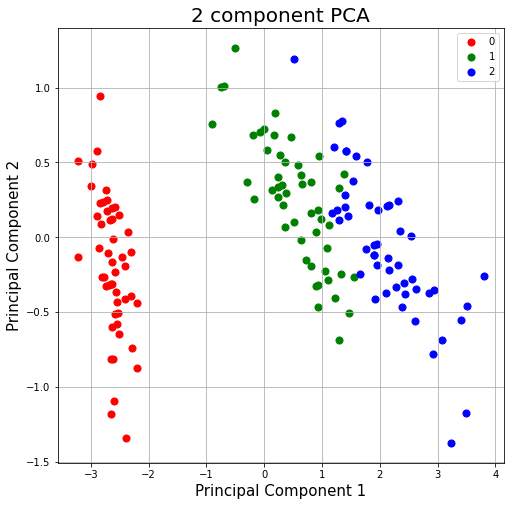

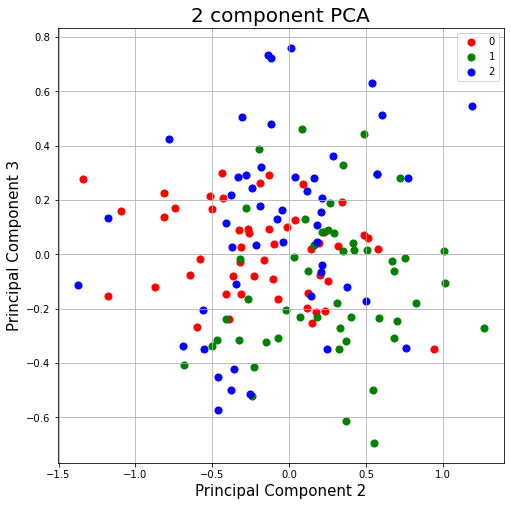

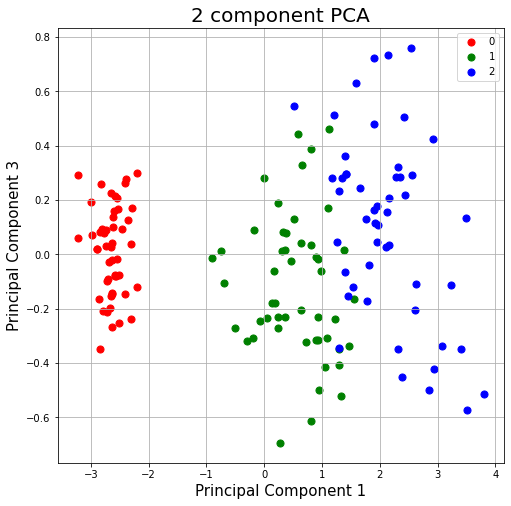

In [5]:
"""
Created on Sat Dec 19 07:34:39 2020

@author: shefa
"""

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

#from sklearn.decomposition import PCA
import pandas as pd

def my_pca(X,no_of_components,yes_no):
    

    data_matrix=X
    data_size = len(data_matrix[1])
    
    
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(len(data_matrix),data_size)
    x_hat = data_matrix - mean_2
    
    cov_matrix = np.cov(x_hat)
    
    
    
    eigen_vals,eigen_vecs = np.linalg.eig(cov_matrix)
    
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]
    
    sorted_eigenvectors = eigen_vecs[:,sorted_eigen_indexes]
    
    
    sum_eigen_vals = sum(eigen_vals)
    
    if yes_no =='no':
        for i in range(2,len(data_matrix)):
             num_pca = i
             eigen_value_trial=sorted_eigen_values[0:i]
             
             sum_eigen_selected_values= sum(eigen_value_trial)
             pov = (sum_eigen_selected_values/sum_eigen_vals)*100
             
             if(pov>90):
                 break
        num_pca = i
    else:
       num_pca= no_of_components
    
    eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
    
    
    return eigenvector_subset

iris = datasets.load_iris()

data = iris.data
iris_df= pd.DataFrame(data=iris.target)

original_data = data.transpose()

eigenvector_subset = my_pca(original_data,3,'yes')
P_transpose = eigenvector_subset.transpose()


mean = np.mean(original_data,axis=1)
mean_1=np.repeat(mean,len(original_data[1]))
mean_2 = mean_1.reshape(len(original_data),len(original_data[1]))
centralised_data = original_data - mean_2
principal_comp = np.matmul(P_transpose,centralised_data)

principal_comp_transpose = principal_comp.transpose()


principal_comp_df = pd.DataFrame(data=principal_comp_transpose)
x_df = pd.concat([principal_comp_df[0],principal_comp_df[1]],axis=1)

principalDf = pd.DataFrame(data = x_df
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([x_df, iris_df], axis = 1)
print(x_df)
finalDf.columns=['principal component 1','principal component 2','target']
print(x_df)

#-----------visualization----------------
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

x_df = pd.concat([principal_comp_df[1],principal_comp_df[2]],axis=1)

principalDf = pd.DataFrame(data = x_df
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([x_df, iris_df], axis = 1)
print(x_df)
finalDf.columns=['principal component 1','principal component 2','target']
print(x_df)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

x_df = pd.concat([principal_comp_df[0],principal_comp_df[2]],axis=1)

principalDf = pd.DataFrame(data = x_df
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([x_df, iris_df], axis = 1)
print(x_df)
finalDf.columns=['principal component 1','principal component 2','target']
print(x_df)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [6]:
# Visualisation

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

(a) Number of principal components should be selected based on the number of p which gives a POV >=90
(b) Number of principal components= 33
(c) k eigenfaces here are 33 eigenfaces


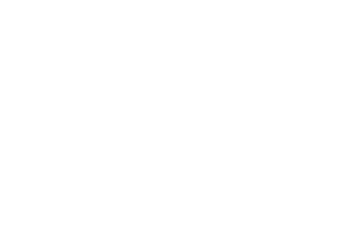

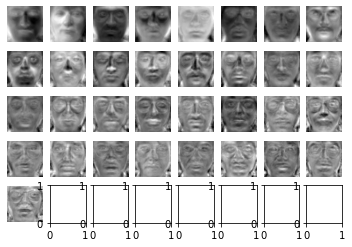

In [11]:

import numpy as np
from matplotlib import pyplot as plt


data, targets= np.load('./Data/Yale_64x64.npy', allow_pickle=True)

features, num_examples = data.shape
test_sample = 0


test_indices =  np.arange(test_sample, num_examples, 11)

train_indices = np.delete(np.arange(num_examples), test_indices)


train_data = data[:, train_indices]
test_data = data[:, test_indices]
#print(test_data)

ex = train_data.transpose()


def my_dual_pca(data_matrix):
    mean = np.mean(data_matrix)

    
    data_size = len(data_matrix[1])
   
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(4096,data_size)
    x_hat = data_matrix - mean_2
    
    Y = x_hat.transpose()/np.sqrt(len(data_matrix[1])-1)
    
    
    u,s,v = np.linalg.svd(Y)
    
    
    eigen_vals = s**2
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    
    
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]
    
    v=v.transpose()
    sorted_eigenvectors = v[:,sorted_eigen_indexes]
    

    sum_eigen_vals = sum(eigen_vals)
    for i in range(1,4096):
         num_pca = i
         eigen_value_trial=sorted_eigen_values[0:i]
         
         sum_eigen_selected_values= sum(eigen_value_trial)
         pov = (sum_eigen_selected_values/sum_eigen_vals)*100
         eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
         if(pov>=90):
             break
         
    num_pca = i
    eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
    
    return eigenvector_subset

def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')
    

eigenvector_subset = my_dual_pca(train_data)

num_pca=len(eigenvector_subset[1])
print("(a) Number of principal components should be selected based on the number of p which gives a POV >=90")
print("(b) Number of principal components=",num_pca)
a=0
b=-1
count=1
plt.axis('off')
f, axarr = plt.subplots(nrows=5,ncols=8) 
    
print("(c) k eigenfaces here are 33 eigenfaces")
for i in range(0,num_pca):
        
         x=eigenvector_subset[:,i]
         if(count<=num_pca):
             if (b==7):
                a=a+1
                b=0
                
             else:
                 b=b+1
             
             print_image(axarr[a][b], x)
             axarr[a][b].axis('off')

             count=count+1
             
         else:
            
            break

In [8]:
# Image compression

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

(a) Low dimensional representations of 15 test images =  [[-1.65984661e+03 -9.38475143e+02 -9.11646369e+00  2.02587020e+02
   3.93995874e+00 -1.63510659e+03  1.95881198e+03 -8.87244850e+01
  -5.10501522e+02 -3.68690233e+02 -9.22847677e+02 -9.25647259e+02
   2.73741386e+03  3.50328271e+02  1.80587489e+03]
 [-3.49512447e+02  5.16685566e+02 -1.47878961e+03 -3.44393489e+02
  -7.64870108e+02  2.13390241e+03 -1.86002269e+03  3.51408371e+02
   9.81217617e+02 -1.10912872e+03  1.21114588e+03  5.59827866e+02
  -1.41469769e+02  4.69818859e+02 -1.75819732e+02]
 [-3.58427662e+02  1.83341566e+03 -2.48977984e+02  2.58098797e+01
  -6.79941042e+02  6.72283475e+02 -1.24637394e+03  2.67561351e+02
   1.33389331e+03  1.80508774e+02 -2.22546677e+03 -1.43374134e+02
   6.26130503e+02  3.63404451e+02 -4.00445879e+02]
 [ 3.87832539e+02 -3.57750200e+01  4.69323109e+02 -2.01951264e+02
   4.88174453e+02  5.45064866e+02 -1.55434238e+03  2.95181270e+02
  -2.57957812e+01 -5.78242153e+02 -1.82773423e+02  4.87216248e+0

(c) A proper evaluation criterion for measuring the loss between an original raw and its corresponding reconstructed images can be given by (|x - x'|)**2 
(d) Loss= 21868379.09481603


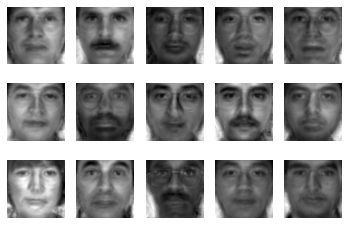

In [13]:
import numpy as np

from matplotlib import pyplot as plt

data, targets= np.load('./Data/Yale_64x64.npy', allow_pickle=True)

features, num_examples = data.shape
test_sample = 0


test_indices =  np.arange(test_sample, num_examples, 11)

train_indices = np.delete(np.arange(num_examples), test_indices)


train_data = data[:, train_indices]
test_data = data[:, test_indices]
#print(test_data)

ex = train_data.transpose()


def my_dual_pca(data_matrix):
    mean = np.mean(data_matrix)

    
    data_size = len(data_matrix[1])
    
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(len(data_matrix),data_size)
    x_hat = data_matrix - mean_2
    
    Y = x_hat.transpose()/np.sqrt(len(data_matrix[1])-1)
    
    
    u,s,v = np.linalg.svd(Y)
    
        
    
    #cov_matrix = np.cov(x_hat)
    #eigen_vals,x = np.linalg.eig(cov_matrix)
    eigen_vals = s**2
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    
    
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]
   
    v=v.transpose()
    sorted_eigenvectors = v[:,sorted_eigen_indexes]
    
    
    sum_eigen_vals = sum(eigen_vals)
    
    for i in range(1,4096):
         num_pca = i
         eigen_value_trial=sorted_eigen_values[0:i]
         
         sum_eigen_selected_values= sum(eigen_value_trial)
         pov = (sum_eigen_selected_values/sum_eigen_vals)*100
         eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
         if(pov>=90):
             break
    return eigenvector_subset

def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')
    

eigenvector_subset = my_dual_pca(train_data)

    
mean = np.mean(test_data,axis=1)
mean_1=np.repeat(mean,len(test_data[1]))
mean_2 = mean_1.reshape(len(test_data),len(test_data[1]))
centralised_test_data = test_data - mean_2
z = np.matmul(eigenvector_subset.transpose(),centralised_test_data)

print("(a) Low dimensional representations of 15 test images = ",z)

x = mean_2 + np.matmul(eigenvector_subset,z)
print("(b) reconstructed faces:")
f, axarr = plt.subplots(nrows=3,ncols=5) 
a=0
b=-1

for i in range(0,15):
    if (b==4):
                a=a+1
                b=0
    else:
                 b=b+1
    print_image(axarr[a][b], x[:,i])
    

error = np.square(test_data - x)

error_sum = np.sum(error)
print("(c) A proper evaluation criterion for measuring the loss between an original raw and its corresponding reconstructed images can be given by (|x - x'|)**2 ")
print("(d) Loss=",error_sum)

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def my_dual_pca(data_matrix):
    mean = np.mean(data_matrix)

   
    data_size = len(data_matrix[1])
    
    mean = np.mean(data_matrix,axis=1)
    mean_1=np.repeat(mean,data_size)
    mean_2 = mean_1.reshape(4096,data_size)
    x_hat = data_matrix - mean_2
    
    Y = x_hat.transpose()/np.sqrt(len(data_matrix[1])-1)
    
    
    u,s,v = np.linalg.svd(Y)
    
    
    #cov_matrix = np.cov(x_hat)
    #eigen_vals,x = np.linalg.eig(cov_matrix)
    eigen_vals = s**2
    
    sorted_eigen_indexes = np.argsort(eigen_vals)[::-1]
    
    
    sorted_eigen_values= eigen_vals[sorted_eigen_indexes]
    
    v=v.transpose()
    sorted_eigenvectors = v[:,sorted_eigen_indexes]
    
    
    sum_eigen_vals = sum(eigen_vals)
    
    for i in range(1,4096):
         num_pca = i
         eigen_value_trial=sorted_eigen_values[0:i]
         
         sum_eigen_selected_values= sum(eigen_value_trial)
         pov = (sum_eigen_selected_values/sum_eigen_vals)*100
         eigenvector_subset = sorted_eigenvectors[:,0:num_pca]
         if(pov>=90):
             break
    return eigenvector_subset

def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')
    
train_X, train_y, test_X, test_y = np.load('./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

eigenvector_subset = my_dual_pca(train_X)

   
mean = np.mean(test_X,axis=1)
mean_1=np.repeat(mean,len(test_X[1]))
mean_2 = mean_1.reshape(len(test_X),len(test_X[1]))

mean_train = np.mean(test_X,axis=1)
mean_train_1=np.repeat(mean_train,len(train_X[1]))
mean_train_2 = mean_train_1.reshape(len(train_X),len(train_X[1]))

centralised_test_data = test_X - mean_2
centralised_train_data = train_X - mean_train_2
z_test = np.matmul(eigenvector_subset.transpose(),centralised_test_data)



x_test = mean_2 + np.matmul(eigenvector_subset,z_test)


z_train = np.matmul(eigenvector_subset.transpose(),centralised_train_data)
x_train = mean_train_2 + np.matmul(eigenvector_subset,z_train)

x_test = x_test.transpose()
x_train = x_train.transpose()

model = SVC(kernel = 'rbf', C = 1)
model.fit(x_train,train_y)
y_pred = model.predict(x_test)
#----------Comparison--------
print("output labels for eigenface trained model",y_pred)

print("Accuracy for model trained using eigenfaces=",accuracy_score(test_y,y_pred))
print("Confusion matrix for model trained on eigenfaces=",confusion_matrix(test_y, y_pred))


x_train_2 = train_X.transpose()
x_test_2 = test_X.transpose()
model.fit(x_train_2,train_y)
y_pred = model.predict(x_test_2)
print("output labels for raw data trained model",y_pred)

print("Accuracy for model trained on raw data=",accuracy_score(test_y,y_pred))
print("Confusion matrix for model trained on raw data=",confusion_matrix(test_y, y_pred))


output labels for eigenface trained model [1 0 0 1 1 1]
Accuracy for model trained using eigenfaces= 0.8333333333333334
Confusion matrix for model trained on eigenfaces= [[2 1]
 [0 3]]
output labels for raw data trained model [1 0 0 1 1 1]
Accuracy for model trained on raw data= 0.8333333333333334
Confusion matrix for model trained on raw data= [[2 1]
 [0 3]]


In [ ]:
# Comparison

### <span style="color:red">=========== End of Assignment 6 ===========</span>